### 분석에 필요한 패키지 Import

In [ ]:
# 다음 코드의 주석을 해제하고 패키지를 설치해주세요.
# !pip install xgboost lightgbm catboost scikit-learn --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

SEED = 42 # random state 통일

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import (
    VotingClassifier,
    RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, StackingClassifier
)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

### 데이터 로드

In [32]:
# df라는 변수에 'Employee.csv' 파일을 읽어와 저장합니다.
df = pd.read_csv('Employee.csv')

In [33]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [34]:
target = 'LeaveOrNot'

In [35]:
X = df.drop(columns=target) # target 컬럼을 제외한 데이터를 X에 저장합니다.
y = df[target]

### 데이터 전처리

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 290.9+ KB


In [39]:
# 범주형 변수 전처리
# 일괄적으로 인코딩을 진행하겠습니다.

cat_cols = [
    'Education',
    'City',
    'Gender',
    'EverBenched'
]
le = LabelEncoder()

for col in cat_cols:    
    # 각 범주형 변수(col)에 대해 인코딩을 수행합니다.
    X[col] = le.fit_transform(X[col].astype(str))

In [42]:
X.head(20)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
5,0,2016,0,3,22,1,0,0
6,0,2015,1,3,38,1,0,0
7,0,2016,0,3,34,0,0,2
8,0,2016,2,3,23,1,0,1
9,1,2017,1,2,37,1,0,2


In [43]:
# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X.head(20)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
5,0,2016,0,3,22,1,0,0
6,0,2015,1,3,38,1,0,0
7,0,2016,0,3,34,0,0,2
8,0,2016,2,3,23,1,0,1
9,1,2017,1,2,37,1,0,2


#### 훈련용 / 테스트용 데이터 분할

In [45]:
# X_scaled와 y를 훈련용과 테스트용 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    random_state=SEED
)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3489, 8)
(3489,)
(1164, 8)
(1164,)


## 모델링

주어진 데이터셋에 대해 단일 모델과 앙상블 기법을 각각 적용해보고 결과를 비교해봅시다.

### 단일 모델 적용

앙상블 기법을 적용하기 전에, 이전에 배웠던 단일 분류 모델들을 적용해봅시다!

(분류 기초 세션 복습 🤓)

#### 1. Logistic Regression

In [47]:
# 모델을 불러와 훈련시킵니다.
lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [48]:
# 모델을 통해 예측을 수행합니다.
y_lr_pred = lr.predict(X_test)

In [49]:
# 계산된 예측값에 대해 정확도를 계산합니다.
lr_accuracy = accuracy_score(y_test, y_lr_pred)
lr_report = classification_report(y_test, y_lr_pred)

print(f"Accuracy score : {lr_accuracy}")
print(f"Report :\n{lr_report}")

Accuracy score : 0.7405498281786942
Report :
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       775
           1       0.70      0.39      0.50       389

    accuracy                           0.74      1164
   macro avg       0.73      0.65      0.66      1164
weighted avg       0.73      0.74      0.72      1164



#### 2. 의사결정나무

In [50]:
tree = DecisionTreeClassifier(random_state=SEED)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_tree_pred = tree.predict(X_test)

In [56]:
tree_accuracy = accuracy_score(y_test, y_tree_pred)
tree_report = classification_report(y_test, y_tree_pred)

print(f"Accuracy score : {tree_accuracy}")
print(f"Report :\n{tree_report}")

Accuracy score : 0.8367697594501718
Report :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       775
           1       0.78      0.72      0.75       389

    accuracy                           0.84      1164
   macro avg       0.82      0.81      0.81      1164
weighted avg       0.83      0.84      0.84      1164



#### 3. SVM

In [53]:
svm = SVC(random_state=SEED)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [54]:
y_svm_pred = svm.predict(X_test)

In [59]:
svm_accuracy = accuracy_score(y_test, y_svm_pred)
svm_report = classification_report(y_test, y_svm_pred)

print(f"Accuracy score : {svm_accuracy}")
print(f"Report :\n{svm_report}")

Accuracy score : 0.665807560137457
Report :
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       775
           1       0.00      0.00      0.00       389

    accuracy                           0.67      1164
   macro avg       0.33      0.50      0.40      1164
weighted avg       0.44      0.67      0.53      1164



#### 4. kNN

In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_knn_pred = knn.predict(X_test)

In [63]:
knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_report = classification_report(y_test, y_knn_pred)

print(f"Accuracy score : {knn_accuracy}")
print(f"Report :\n{knn_report}")

Accuracy score : 0.813573883161512
Report :
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       775
           1       0.80      0.59      0.68       389

    accuracy                           0.81      1164
   macro avg       0.81      0.76      0.77      1164
weighted avg       0.81      0.81      0.81      1164



#### 네 가지 단일 모델의 결과 비교

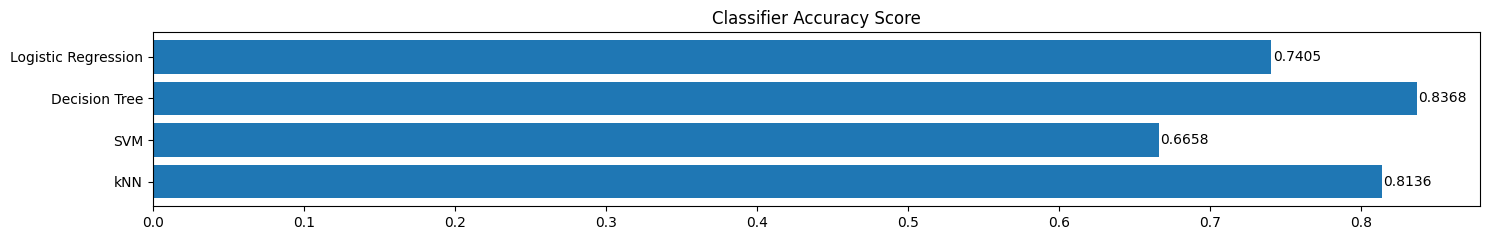

In [64]:
model_name = ['Logistic Regression', 'Decision Tree', 'SVM', 'kNN']
accuracy_scores = [lr_accuracy, tree_accuracy, svm_accuracy, knn_accuracy]

plt.figure(figsize=(15, 2.5))
bars = plt.barh(model_name[::-1], accuracy_scores[::-1])

for bar, accuracy in zip(bars, accuracy_scores[::-1]):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2, f'{accuracy:.4f}', va='center')

plt.title("Classifier Accuracy Score")
plt.xlabel("")
plt.tight_layout()
plt.show()

## 앙상블 (Ensemble)

### 1. Voting

`VotingClassifier`

- **estimators**: 사용할 기본 분류기 리스트 (이름, 모델) 형태로 지정
- **voting**: 'hard' 또는 'soft' (기본값: 'hard')
- **weights**: 각 분류기별 가중치
- **n_jobs**: 병렬 처리 수

[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [65]:
# estimators 인자로 들어갈 분류기 리스트를 지정합니다.
models = [
    ('lr', LogisticRegression(random_state=SEED)), 
    ('dt', DecisionTreeClassifier(random_state=SEED)),
    ('rf', RandomForestClassifier(random_state=SEED))
]

In [ ]:
# 모델 생성
# estimators는 models로, voting은 'hard'로 설정합니다.
voting_clf = VotingClassifier(
    estimators=models, 
    voting='hard',
)

# 모델 훈련
voting_clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_voting_pred = voting_clf.predict(X_test)

# 정확도 출력
print(f"Voting Accuracy: {accuracy_score(y_test, y_voting_pred):.4f}")

Voting Accuracy: 0.8522


### 2. Bagging

`RandomForestClassifier`

- **n_estimators**: 트리 개수
- **max_depth**: 트리 최대 깊이
- **max_features**: 노드 분할 시 고려할 특성 수
- **min_samples_split**: 노드 분할에 필요한 최소 샘플 수
- **bootstrap**: 부트스트랩 여부 (기본값: True)

[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [68]:
# 모델 생성
rf_clf = RandomForestClassifier(random_state=SEED)

# 모델 훈련
rf_clf.fit(X_train, y_train) 

# 테스트 데이터에 대한 예측 수행
y_rf_pred = rf_clf.predict(X_test)

# 정확도 출력
print(f"Bagging (Random Forest) Accuracy: {accuracy_score(y_test, y_rf_pred):.4f}")

Bagging (Random Forest) Accuracy: 0.8531


### 3. Boosting

#### 3.1 AdaBoost

`AdaBoostClassifier`

- **estimator**: 기본 약한 학습기
- **n_estimators**: 학습기 개수
- **learning_rate**: 학습률

[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [69]:
# 모델 생성
adaboost = AdaBoostClassifier(random_state=SEED)

# 모델 훈련
adaboost.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_ada_pred = adaboost.predict(X_test)

# 정확도 출력
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_ada_pred):.4f}")

AdaBoost Accuracy: 0.8230


#### 3.2 GBM

`GradientBoostingClassifier`

- **n_estimators**: 부스팅 단계 수
- **learning_rate**: 각 단계의 기여도
- **max_depth**: 개별 트리의 최대 깊이
- **subsample**: 학습 데이터 샘플 비율
- **min_samples_split**: 노드 분할 최소 샘플 수
- **loss**: 손실 함수 ('log_loss', 'exponential')

[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [70]:
# 모델 생성
gbm = GradientBoostingClassifier(random_state=SEED)

# 모델 훈련
gbm.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_gbm_pred = gbm.predict(X_test)

# 정확도 출력
print(f"GBM Accuracy: {accuracy_score(y_test, y_gbm_pred):.4f}")

GBM Accuracy: 0.8660


#### 3.3 XGBoost

`XGBClassifier`

- **n_estimators**: 부스팅 반복 횟수
- **learning_rate**: 학습률
- **max_depth**: 트리 깊이
- **subsample**: 샘플 비율
- **colsample_bytree**: 트리당 특성 샘플 비율
- **gamma**: 분할 최소 손실 감소
- **objective**: 목적 함수 ('multi:softprob', 'binary:logistic' 등)
- **eval_metric**: 평가 지표 ('mlogloss', 'logloss', 'error' 등)

[Docs](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)

In [71]:
# 모델 생성
xgboost = xgb.XGBClassifier(random_state=SEED)

# 모델 훈련
xgboost.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_xgb_pred = xgboost.predict(X_test)

# 정확도 출력
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_xgb_pred):.4f}")

XGBoost Accuracy: 0.8608


#### 3.4 LightGBM

`LGBMClassifier`

- **n_estimators**: 트리 개수
- **learning_rate**: 학습률
- **max_depth**: 최대 깊이 (기본: -1 → 제한 없음)
- **num_leaves**: 리프 노드 수
- **subsample**: 데이터 샘플 비율
- **colsample_bytree**: 트리당 특성 샘플 비율
- **min_child_samples**: 리프 노드의 최소 샘플 수
- **objective**: 'binary', 'multiclass' 등

[Docs](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [73]:
# 모델 생성 (LGBMClassifier)
lgbm = lgb.LGBMClassifier(random_state=SEED, verbose=-1)

# 모델 훈련
lgbm.fit(X_train,y_train)

# 테스트 데이터에 대한 예측 수행
y_lgbm_pred = lgbm.predict(X_test)

# 정확도 출력
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_lgbm_pred):.4f}")

LightGBM Accuracy: 0.8686


#### 3.5 CatBoost

`CatBoostClassifier`

- **iterations**: 부스팅 반복 횟수
- **learning_rate**: 학습률
- **depth**: 트리 깊이
- **l2_leaf_reg**: L2 정규화 계수
- **loss_function**: 손실 함수 (예: 'Logloss', 'MultiClass')
- **random_state**: 랜덤 시드
- **verbose**: 출력 제어 (0: 진행 메시지 표시하지 않음, 100: 진행률 표시)

[Docs](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier)

In [74]:
# 모델 생성
cb = CatBoostClassifier(random_state=SEED, depth=10, verbose=0)

# 모델 훈련
cb.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_cb_pred = cb.predict(X_test)

# 정확도 출력
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_cb_pred):.4f}")

CatBoost Accuracy: 0.8634


### 4. Stacking

`StackingClassifier`

- **estimators**: 기본 모델 목록 (이름, 모델) 쌍의 리스트
- **final_estimator**: 최종 분류기 (기본값: LogisticRegression)
- **cv**: 교차 검증 폴드 수 (기본값: 5)
- **passthrough**: 원본 특성을 메타 모델에 전달 여부 (기본값: False)
- **n_jobs**: 병렬 처리 수

[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

In [75]:
base_learners = [
    ('lr', LogisticRegression(random_state=SEED)),
    ('dt', DecisionTreeClassifier(random_state=SEED)),
    ('rf', RandomForestClassifier(random_state=SEED))
]

model = LogisticRegression(random_state=SEED)

stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=model, # 최종 분류기를 LogisticRegression(random_state=SEED) 로 지정해주세요
    cv=5
)

# 모델 훈련
stack_clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_stk_pred = stack_clf.predict(X_test)

# 정확도 출력
print(f"Stacking Accuracy: {accuracy_score(y_test, y_stk_pred):.4f}")

Stacking Accuracy: 0.8548


## [과제] 모델 성능을 높여봅시다!

이제 직접 다른 전처리 기법, 피쳐 엔지니어링, 앙상블 기법, 추가 하이퍼파라미터 튜닝 등등.. 을 수행해서 더 높은 정확도를 가지는 모델을 만들어보세요.\
다양한 방법을 수행해보고, 비교한 후 결과를 정리해서 마크다운으로 남겨주시면 되겠습니다! 이때 각 단계별로 어떤 방법을 수행했는지에 대한 설명을 꼭 달아주세요.

- 정확도는 소수점 자릿수 제한 없이 모두 출력합니다.

In [78]:
data = df.copy()

data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [82]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# 대충 분포 확인

<Axes: xlabel='Age', ylabel='Count'>

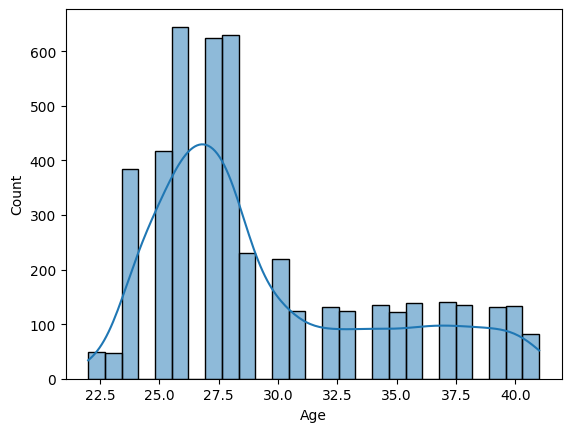

In [108]:
sns.histplot(data=data, x='Age', kde=True) 

<Axes: xlabel='Gender', ylabel='count'>

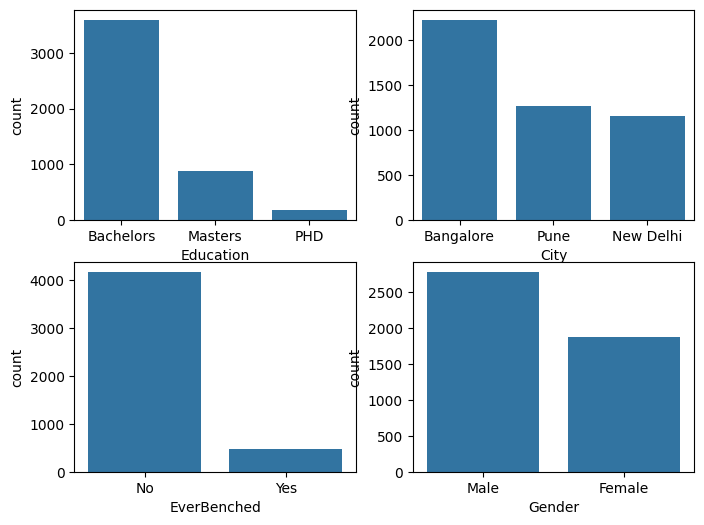

In [99]:
# 서브플롯 구성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))  # 2행 2열 배치
axes = axes.flatten()  # 1D로 변환

sns.countplot(data=data, x='Education', ax=axes[0])
sns.countplot(data=data, x='City', ax=axes[1])
sns.countplot(data=data, x='EverBenched', ax=axes[2])
sns.countplot(data=data, x='Gender', ax=axes[3])

In [110]:
# 범주형 변수 전처리
# 일괄적으로 인코딩을 진행하겠습니다.

cat_cols = [
    'Education',
    'City',
    'Gender',
    'EverBenched'
]
le = LabelEncoder()

for col in cat_cols:    
    # 각 범주형 변수(col)에 대해 인코딩을 수행합니다.
    data[col] = le.fit_transform(data[col].astype(str))

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int64
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int64
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int64
 6   EverBenched                4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


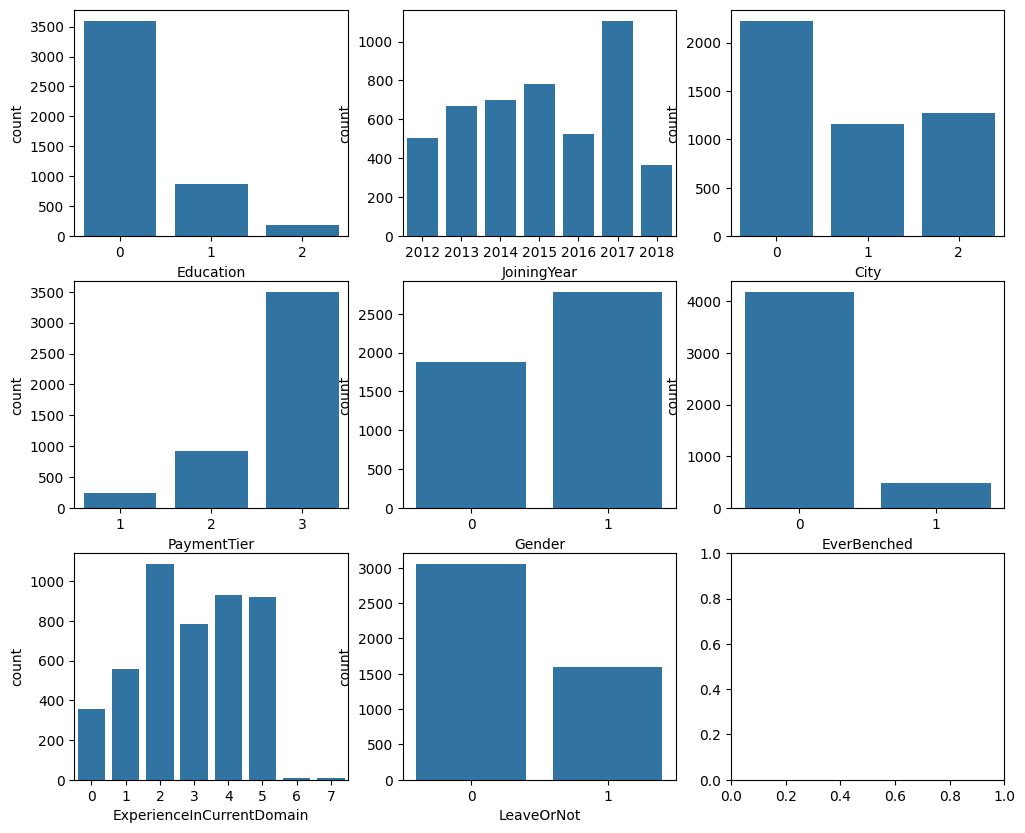

In [119]:
cols = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']

# 서브플롯 구성
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))  # 2행 2열 배치
axes = axes.flatten()  # 1D로 변환

for i in range(len(cols)):
    sns.countplot(data=data, x=cols[i], ax=axes[i])

# 데이터 split 진행

In [132]:
X = data.drop(columns='LeaveOrNot')
y = data['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

# 전처리

## paymenttier -> 원핫인코딩 적용

In [133]:
X_train = pd.get_dummies(X_train, columns=['PaymentTier'], drop_first=True)

In [134]:
X_train

,Education,JoiningYear,City,Age,Gender,EverBenched,ExperienceInCurrentDomain,PaymentTier_2,PaymentTier_3
3274,0,2013,0,35,1,0,0,False,True
2578,2,2013,1,27,0,0,5,False,True
3716,0,2015,2,32,0,0,3,False,True
2073,1,2017,2,29,0,0,2,True,False
1033,0,2016,0,28,1,0,3,False,True
...,...,...,...,...,...,...,...,...,...
4426,0,2014,0,32,1,0,1,False,True
466,0,2013,0,26,1,1,4,False,True
3092,0,2016,0,39,0,0,1,False,True
3772,0,2015,0,41,1,0,1,False,True


## ExperienceInCurrentDomain -> 정규화

In [135]:
# 2. 정규화
scaler = StandardScaler()
X_train['Experience_scaled'] = scaler.fit_transform(X_train[['ExperienceInCurrentDomain']])

In [136]:
X_train

,Education,JoiningYear,City,Age,Gender,EverBenched,ExperienceInCurrentDomain,PaymentTier_2,PaymentTier_3,Experience_scaled
3274,0,2013,0,35,1,0,0,False,True,-1.864636
2578,2,2013,1,27,0,0,5,False,True,1.341729
3716,0,2015,2,32,0,0,3,False,True,0.059183
2073,1,2017,2,29,0,0,2,True,False,-0.582090
1033,0,2016,0,28,1,0,3,False,True,0.059183
...,...,...,...,...,...,...,...,...,...,...
4426,0,2014,0,32,1,0,1,False,True,-1.223363
466,0,2013,0,26,1,1,4,False,True,0.700456
3092,0,2016,0,39,0,0,1,False,True,-1.223363
3772,0,2015,0,41,1,0,1,False,True,-1.223363


## EverBenched 삭제

In [137]:
X_train.drop(columns='EverBenched', inplace=True)

In [138]:
X_train

,Education,JoiningYear,City,Age,Gender,ExperienceInCurrentDomain,PaymentTier_2,PaymentTier_3,Experience_scaled
3274,0,2013,0,35,1,0,False,True,-1.864636
2578,2,2013,1,27,0,5,False,True,1.341729
3716,0,2015,2,32,0,3,False,True,0.059183
2073,1,2017,2,29,0,2,True,False,-0.582090
1033,0,2016,0,28,1,3,False,True,0.059183
...,...,...,...,...,...,...,...,...,...
4426,0,2014,0,32,1,1,False,True,-1.223363
466,0,2013,0,26,1,4,False,True,0.700456
3092,0,2016,0,39,0,1,False,True,-1.223363
3772,0,2015,0,41,1,1,False,True,-1.223363


# test 데이터에도 똑같이 적용

In [139]:
# 1. 원핫인코딩
X_test = pd.get_dummies(X_test, columns=['PaymentTier'], drop_first=True)
# 2. 정규화
scaler = StandardScaler()
X_test['Experience_scaled'] = scaler.fit_transform(X_test[['ExperienceInCurrentDomain']])
# 3. 열 제거
X_test.drop(columns='EverBenched', inplace=True)

In [140]:
X_test

,Education,JoiningYear,City,Age,Gender,ExperienceInCurrentDomain,PaymentTier_2,PaymentTier_3,Experience_scaled
297,0,2016,0,24,0,2,False,True,-0.578790
2705,0,2013,0,26,0,4,False,True,0.708147
501,0,2017,1,25,0,3,True,False,0.064679
1272,1,2015,2,28,0,2,True,False,-0.578790
3956,0,2012,0,33,1,1,False,True,-1.222259
...,...,...,...,...,...,...,...,...,...
4417,0,2015,2,36,0,3,True,False,0.064679
1533,1,2017,1,28,1,0,False,True,-1.865728
3508,0,2014,0,35,0,2,False,True,-0.578790
52,0,2016,0,34,0,0,False,True,-1.865728


# 보팅

In [150]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# estimators 인자로 들어갈 분류기 리스트를 지정합니다.
models = [
    ('lr', LogisticRegression(random_state=SEED)), 
    ('dt', DecisionTreeClassifier(random_state=SEED)),
    ('rf', RandomForestClassifier(random_state=SEED)),
    ('xgb', XGBClassifier(random_state=SEED)),
    ('gb', GradientBoostingClassifier(random_state=SEED)),
    ('lgb', LGBMClassifier(random_state=SEED))
]

# 모델 생성
# estimators는 models로, voting은 'hard'로 설정합니다.
voting_clf = VotingClassifier(
    estimators=models, 
    voting='hard',
)

# 모델 훈련
voting_clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_voting_pred = voting_clf.predict(X_test)

# 정확도 출력
print(f"Voting Accuracy: {accuracy_score(y_test, y_voting_pred):.4f}")

Voting Accuracy: 0.8720


## 정확도 : 0.8720

# 스태킹

In [156]:
from xgboost import XGBClassifier

base_learners = [
    ('lr', LogisticRegression(random_state=SEED)), 
    ('dt', DecisionTreeClassifier(random_state=SEED)),
    ('rf', RandomForestClassifier(random_state=SEED)),
    ('xgb', XGBClassifier(random_state=SEED)),
    ('gb', GradientBoostingClassifier(random_state=SEED)),
]

# 최종 분류기 : xgb
model = LGBMClassifier(random_state=SEED)

stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=model,
    cv=5
)

# 모델 훈련
stack_clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_stk_pred = stack_clf.predict(X_test)

# 정확도 출력
print(f"Stacking Accuracy: {accuracy_score(y_test, y_stk_pred):.4f}")

Stacking Accuracy: 0.8686
